In [1]:
# 1) Perform general Data analysis
#importing the libraries
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [3]:
#loading the data
data=pd.read_csv(r"C:\Users\merug\Downloads\autos.csv", encoding='iso-8859-1')

In [4]:
#making another copy of data
data1=data.copy()

In [5]:
#Removing duplicate values and replacing specified value in empty boxes
data1=data1.drop_duplicates()
data1 = data1.fillna("Not mentioned")
data1.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,Not mentioned,1993,manuell,0,golf,150000,0,benzin,volkswagen,Not mentioned,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,Not mentioned,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,Not mentioned,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
# 1)   The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?
# Ans) We can reduce the data's memory usage simply by dropping unnecessary columns and changing the data types of columns.
# 2) What is the Average price of vehicle by fuel type and gearbox type.Give a plot
d = pd.pivot_table(data1, index ="fuelType", columns="gearbox", values="price", aggfunc=["mean"])
d

mean                            
gearbox       Not mentioned     automatik       manuell
fuelType                                               
Not mentioned  45920.264151   8150.885786  2.523221e+04
andere          2170.581818   8434.172414  1.732090e+07
benzin         49029.643640  12249.123295  6.567152e+03
cng             2499.428571   6737.717949  4.572039e+03
diesel         31936.728888  18810.346082  7.326334e+03
elektro         4296.500000  22900.278481  3.384615e+03
hybrid          9309.875000  15281.959821  1.201370e+04
lpg             2791.691176  22195.988131  3.255393e+03

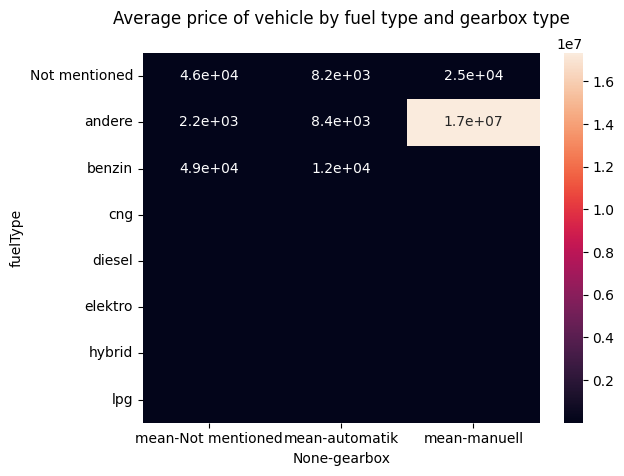

In [7]:
sns.heatmap(d, annot=True)
plt.title("Average price of vehicle by fuel type and gearbox type\n")
plt.show()

In [8]:
#  3) What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot
e = pd.pivot_table(data1, index="vehicleType", columns="gearbox", values="powerPS", aggfunc="mean")
e

gearbox,Not mentioned,automatik,manuell
vehicleType,,,
Not mentioned,25.285247,117.073958,82.833566
andere,92.097561,124.922438,100.026545
bus,46.131737,140.884166,110.328334
cabrio,69.846257,188.922414,133.495202
coupe,89.469388,218.723713,154.581977
kleinwagen,37.697537,75.040381,69.628014
kombi,51.426361,174.859625,125.260903
limousine,48.718546,182.454155,117.023218
suv,44.692529,210.521964,127.734295


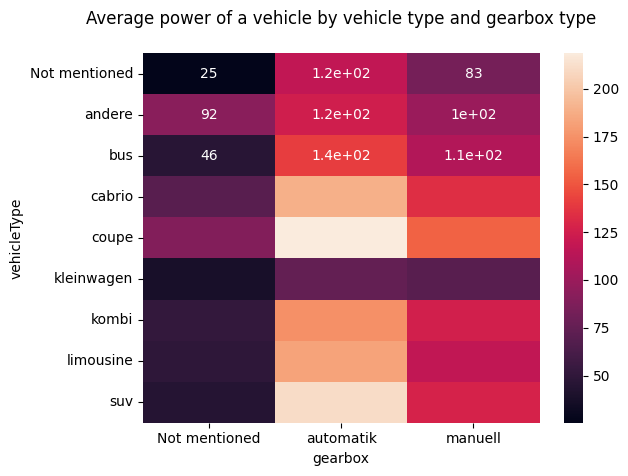

In [9]:
sns.heatmap(e, annot=True)
plt.title("Average power of a vehicle by vehicle type and gearbox type\n")
plt.show()

In [10]:
# 4) What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this
avg_price = pd.pivot_table(data1, index="brand", columns="vehicleType", values="price", aggfunc="mean")
avg_price

vehicleType,Not mentioned,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,,
alfa_romeo,298791.448000,3.153333e+03,NaN,9147.179487,6897.190083,4466.242678,3580.161926,3067.774841,0.000000
audi,9622.747037,9.768120e+04,3485.000000,13441.196564,16341.915486,7358.435834,17069.568857,16238.554551,24599.234542
bmw,11934.379106,2.686439e+03,27569.884615,38010.594552,32097.647113,4432.658696,9001.496376,9613.617946,15924.963470
chevrolet,12205.296552,1.003280e+04,6189.300000,24026.621622,16317.023438,3029.557461,4899.090090,5452.099567,9830.491228
chrysler,2378.834586,8.888333e+03,2630.515982,4324.531120,9174.240000,3124.833333,4867.845528,4173.444444,5888.391304
citroen,1986.634652,3.521024e+03,4409.132179,4536.408696,2695.552632,3029.278894,3724.929022,41831.889959,10810.540541
dacia,4231.392157,4.450000e+03,8606.700000,NaN,NaN,4878.726457,4166.642857,3359.990291,9761.972093
daewoo,835.128205,9.938000e+02,1262.777778,900.000000,428.625000,1110.324627,816.340426,983.981308,1900.000000
daihatsu,866.584158,1.075000e+03,1201.500000,7761.000000,NaN,1449.787476,3420.294118,3532.106383,2066.918367


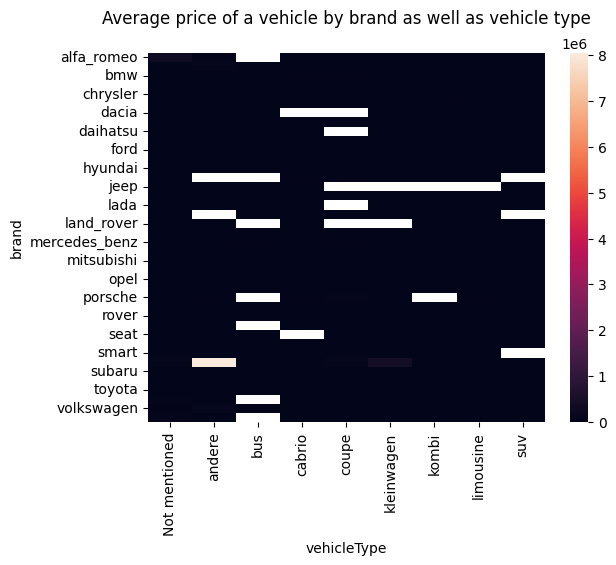

In [11]:
sns.heatmap(avg_price)
plt.title("Average price of a vehicle by brand as well as vehicle type\n")
plt.show()